In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

# read into df from test and train csv files and combine them 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = [train_df, test_df]

In [13]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
# from lightgbm import LGBMClassifier

# To measure time
from time import time

In [14]:
# # get the data and consolidate it into one
# train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

print(train_df.shape, test_df.shape)

df = pd.concat([train_df, test_df])

df.shape

(7352, 563) (2947, 563)


(10299, 563)

In [15]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [16]:
features = df.columns.values.tolist()
unique_sensors = sorted(set([feature.split('-')[0] for feature in features]))
print(f'Sensors:')
for sensor in unique_sensors: print(sensor)

Sensors:
Activity
angle(X,gravityMean)
angle(Y,gravityMean)
angle(Z,gravityMean)
angle(tBodyAccJerkMean),gravityMean)
angle(tBodyAccMean,gravity)
angle(tBodyGyroJerkMean,gravityMean)
angle(tBodyGyroMean,gravityMean)
fBodyAcc
fBodyAccJerk
fBodyAccMag
fBodyBodyAccJerkMag
fBodyBodyGyroJerkMag
fBodyBodyGyroMag
fBodyGyro
subject
tBodyAcc
tBodyAccJerk
tBodyAccJerkMag
tBodyAccMag
tBodyGyro
tBodyGyroJerk
tBodyGyroJerkMag
tBodyGyroMag
tGravityAcc
tGravityAccMag


In [17]:
# Checking in case there is any duplicated column
df.columns.duplicated().sum()

0

In [18]:
# See the different types of activities
unique_activities = df['Activity'].unique()
unique_activities

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Hence we see a mix of equi-level movelement (walking), no movement (standing, sitting, laying), and multi-level movement (walking downstairs, walking upstairs). Logic tells us that regarding position, equi-level movement will have less rise in altitude compared to using the stairs

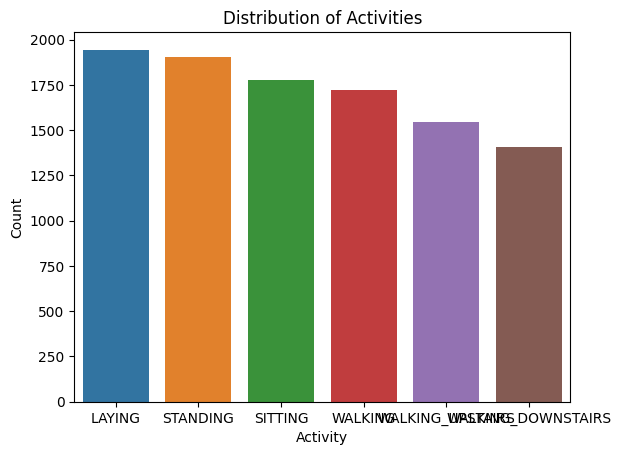

In [19]:
# Check the distribution of the activities
val_counts = df['Activity'].value_counts()

# plotting distribution
sns.barplot(x=val_counts.index, y=val_counts.values)
plt.title('Distribution of Activities')
plt.ylabel('Count')
plt.xlabel('Activity')
plt.show()

Laying is the most popular activity. Not super surprising.

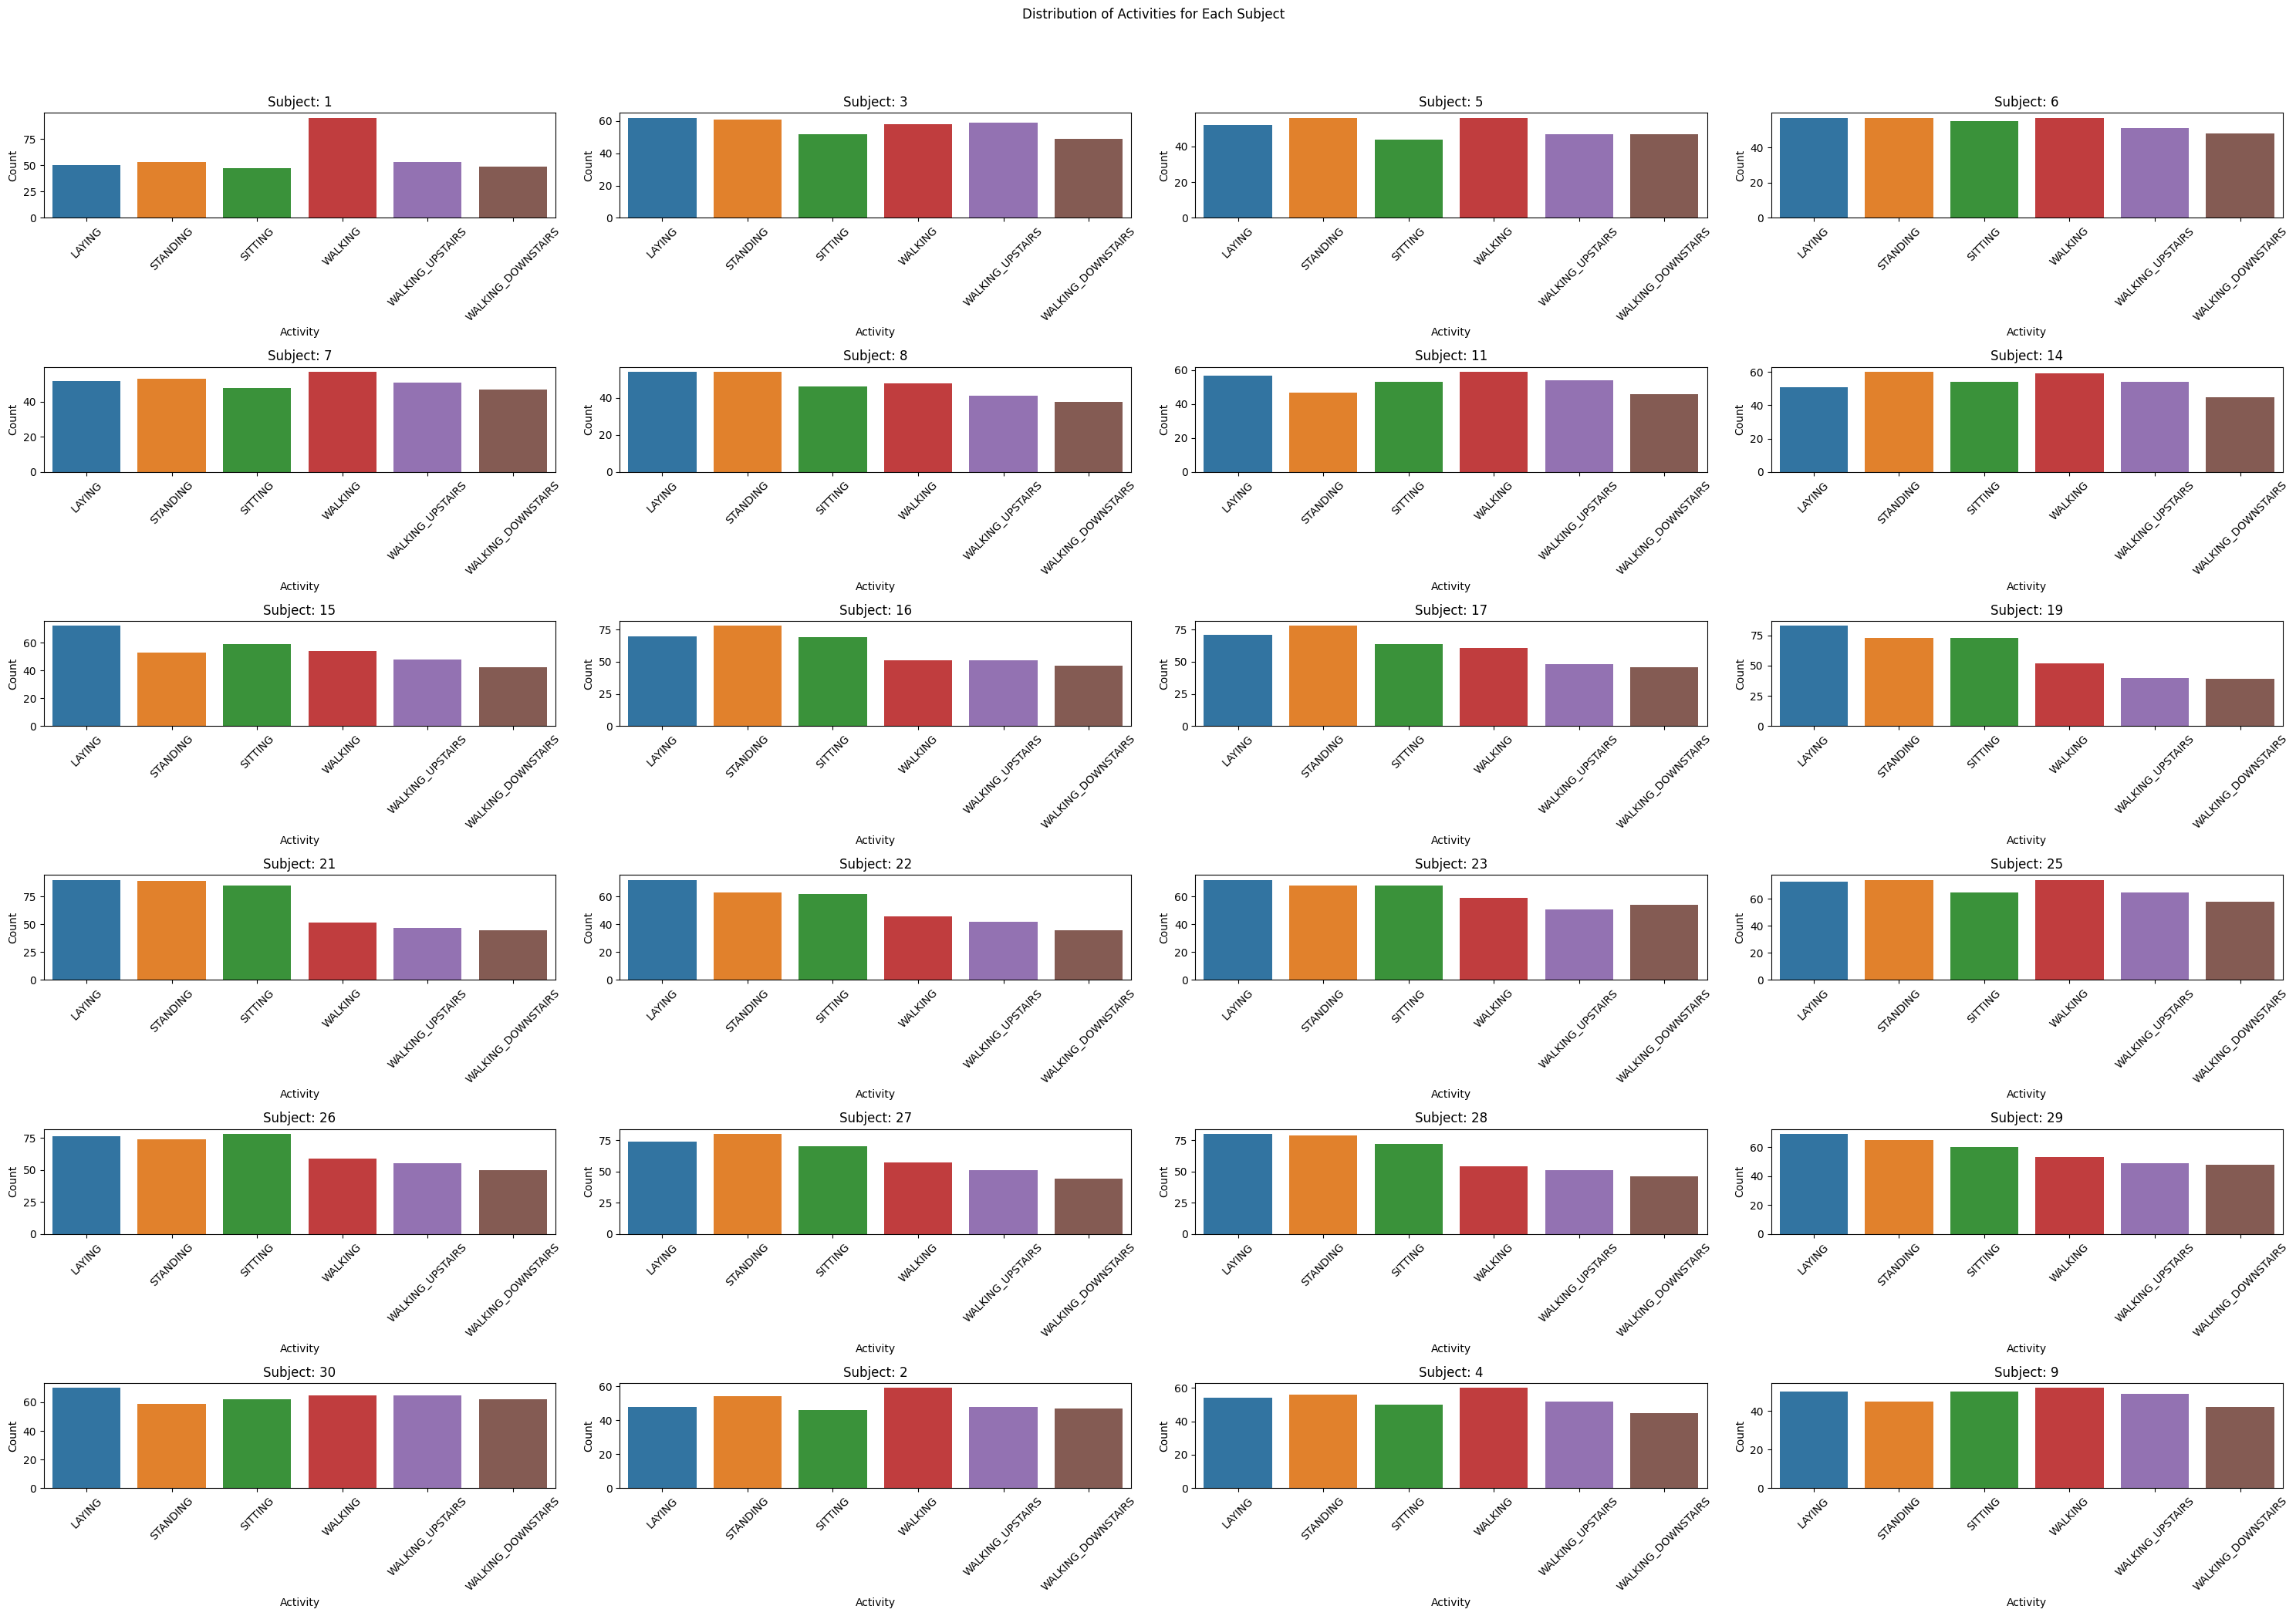

In [20]:
unique_subjects = df['subject'].unique()
n_subjects = len(unique_subjects)
rows = math.ceil(n_subjects / 5)
cols = 4

# Order the activities beforehand so that they are in the same order every time
activity_order = df['Activity'].value_counts().index.tolist()

fig, axes = plt.subplots(rows, cols, figsize=(30, 22))
fig.suptitle('Distribution of Activities for Each Subject')

for i, ax in enumerate(axes.flatten()):
    if i < n_subjects:
        # Filter the DataFrame for the current subject
        subject_df = df[df['subject'] == unique_subjects[i]]

        # Plotting the histogram with a consistent activity order
        sns.barplot(x=subject_df['Activity'].value_counts().index,
                    y=subject_df['Activity'].value_counts().values,
                    order=activity_order,  # Use the global order
                    ax=ax)

        ax.set_title(f'Subject: {unique_subjects[i]}')
        ax.set_xlabel('Activity')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_ylabel('Count')
    else:
        fig.delaxes(ax)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


These plots represent the activity each subject has done. From this plot, we can confirm that each subject in this experiment were subjected to every single activity.

In [21]:
# Group by 'subject' and count the number of rows for each subject
subject_row_counts = df.groupby('subject').size()

# Display the result
# print(subject_row_counts)

subject_row_counts_df = subject_row_counts.reset_index(name='Count')
# print(subject_row_counts_df)

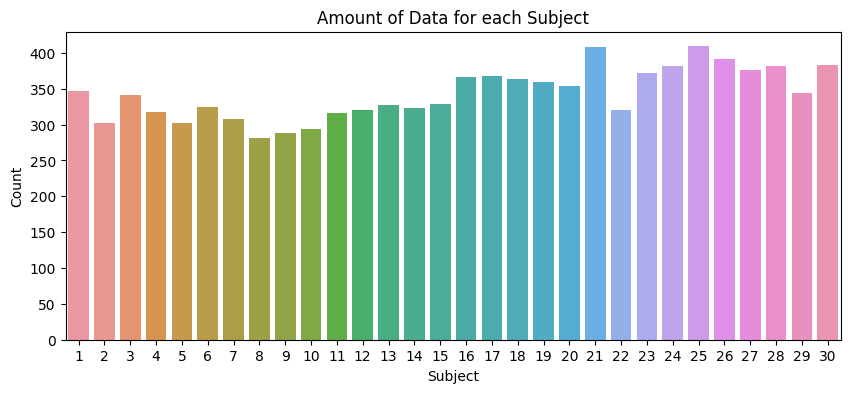

In [22]:
plt.figure(figsize=(10, 4))
sns.barplot(x=subject_row_counts_df['subject'].values, y=subject_row_counts_df['Count'].values)
plt.title('Amount of Data for each Subject')
plt.ylabel('Count')
plt.xlabel('Subject')
plt.show()

In [23]:
# Display coorelation heatmap with sns
# df.pop('Activity')
# plt.figure(figsize=(16, 12))
# sns.heatmap(df.corr(), annot=True, fmt='.2f')
# plt.show()

## Coorelation Heatmap (M)
and other coorelation related statistics. I started working on this above ^^

In [24]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
# print(df_copy)
subject_data = df_copy.pop('subject')
label = df_copy.pop('Activity')
# label_counts = label.value_counts()

# Encode the categorical label 'Activity'
label_encoder = LabelEncoder()
label_encoder.fit(label)
label_encoded = label_encoder.transform(label)

label_encoded




array([2, 2, 2, ..., 5, 5, 5])

In [25]:
# df['Activity'] = label_encoded

# # print(df_encoded.shape)

# def split_iterate(df_encoded, colname='Activity'):
#     return [x for __, x in df_encoded.groupby(colname)]

# split = split_iterate(df)

# pd.DataFrame(split)


# # for df in split:
# #     print(df['Activity'].unique)

# #Activities in question: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
# features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tBodyAcc-std()-X','tBodyAcc-std()-Y',	'tBodyAcc-std()-Z',	'tBodyAcc-mad()-X',	'tBodyAcc-mad()-Y',	'tBodyAcc-mad()-Z',	'tBodyAcc-max()-X']

# sub1, sub2, sub3, sub4, sub5, sub6 = split

# subdata = [sub1, sub2, sub3, sub4, sub5, sub6]

# subdata  = [df[features] for df in subdata]


# # print(sub1.shape)
# # print(sub1)
# # print(sub2.shape)
# # print(sub3.shape)
# # print(sub4.shape)
# # print(sub5.shape)
# # print(sub6.shape)

# #### features that may be beneficial for futher analysis:

# # for i, df in enumerate(subdata, start=1):
# #     plt.figure(figsize=(10, 8))
# #     matrix = df.corr(method = 'spearman')  # Change to df.corr(method='spearman') for Spearman correlation
# #     sns.heatmap(matrix, annot=True, cmap='coolwarm')
# #     plt.title(f'Correlation Heatmap for Sub {i}')
# #     plt.show()
# activity_labels = ['LAYING ', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

# for i, df in enumerate(subdata, start=1):
#     plt.figure(figsize=(10, 8))
#     # Calculating correlation matrix (consider using Spearman's method if features are not normally distributed)
#     matrix = df.corr(method='pearson')  # or 'spearman'
#     sns.heatmap(matrix, annot=True, cmap='coolwarm')
#     plt.title(f'Correlation Heatmap for {activity_labels[i-1]}')
#     plt.show()

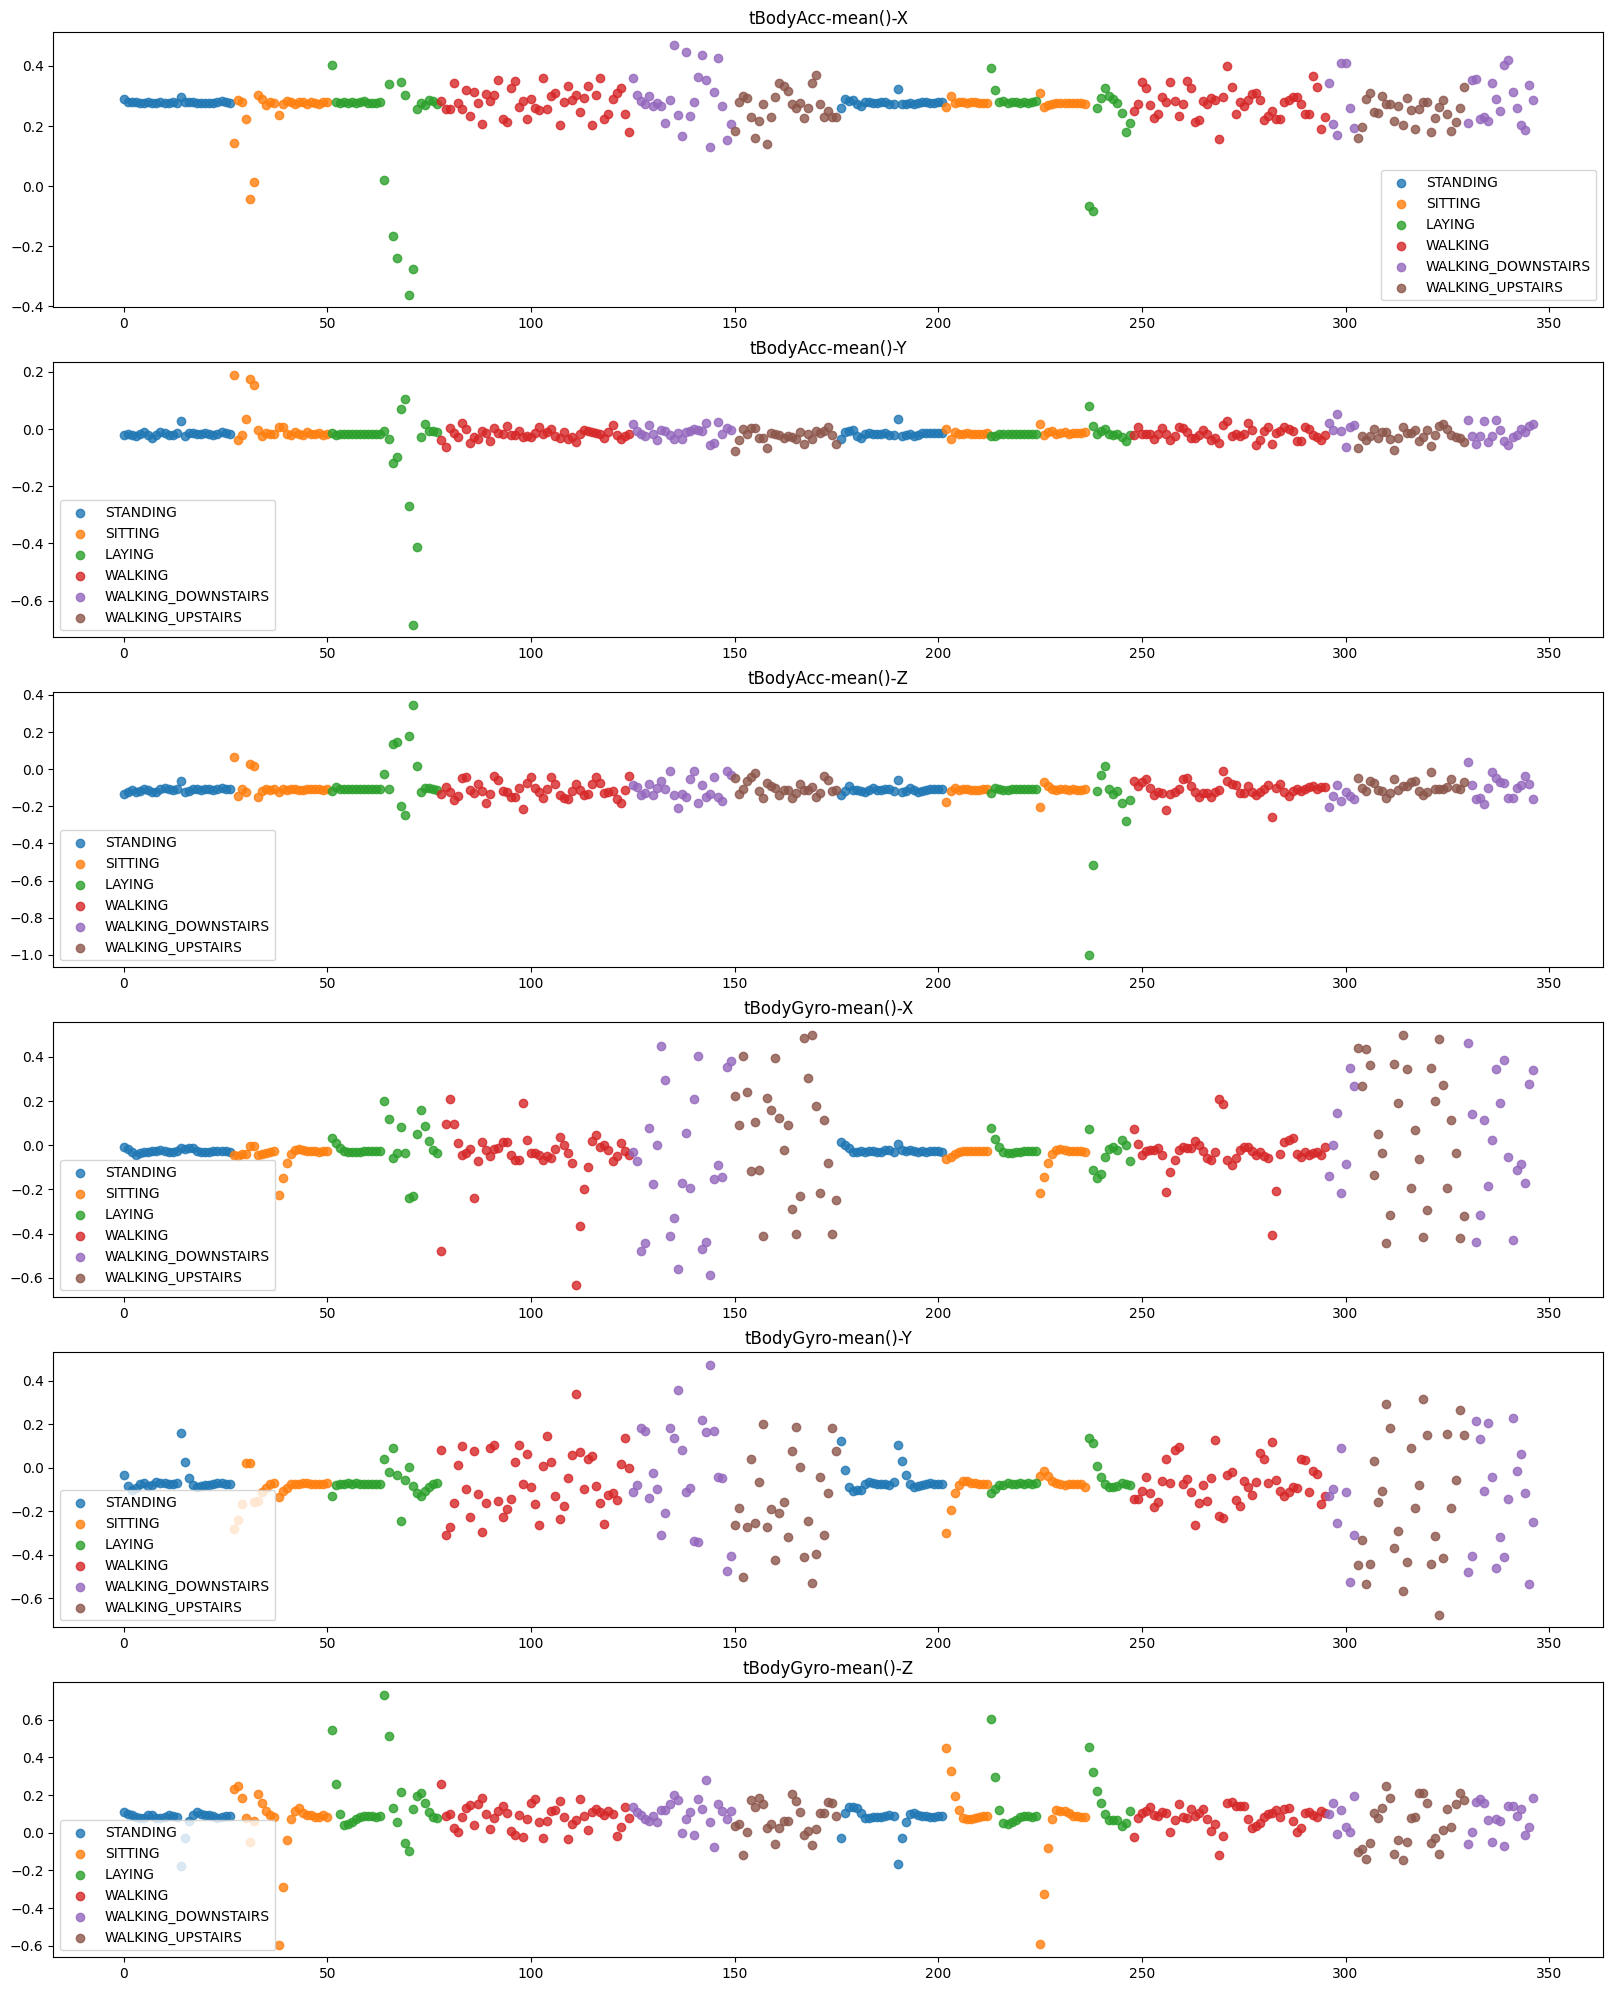

In [43]:
subject1_df = df[df['subject'] == 1]

set_sensors = ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
               'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z')

fig, axs = plt.subplots(len(set_sensors), figsize=(20, 25))

for i, sensor in enumerate(set_sensors):
    axs[i].set_title(sensor)
    for activity in subject1_df['Activity'].unique():
        activity_df = subject1_df[subject1_df['Activity'] == activity]
        axs[i].scatter(activity_df.index, activity_df[sensor], label=activity, alpha=0.8)  # alpha for transparency
    axs[i].legend()

plt.show()


Next, we need to conduct preprocessing and feature engineering

Conducting Principle Component Analysis to reduce dimensionality, ordered by the amount of variance they explain in the data. We have chosen to retain 95% of the variation of the data, which brings us from 561 features down to 69 features.

In [ ]:
# df_copy = df.copy()
# # print(df_copy)
# subject_data = df_copy.pop('subject')
# label = df_copy.pop('Activity')
# label_counts = label.value_counts()

# Reduce dimensions (speed up)
print(df_copy.shape)
pca = PCA(n_components=0.95, random_state=3)
df_copy = pca.fit_transform(df_copy)
print(df_copy.shape)

df_copy = pd.DataFrame(df_copy)
df_copy.head()

(10299, 561)
(10299, 69)


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-2.704421,-1.360748,-0.387621,-0.301226,0.349017,0.651827,-0.307332,0.211189,-0.343836,1.157274,...,-0.092408,0.315992,-0.041752,0.257506,0.092314,-0.187578,-0.054947,0.239645,-0.332378,-0.040504
1,-4.349437,-1.024420,-0.895874,-0.303275,0.329188,0.657983,-0.500166,0.714212,0.315614,1.015160,...,-0.025450,0.004692,-0.149881,-0.548064,0.496386,-0.040897,0.025698,0.367606,-0.113963,0.006233
2,-5.007370,-0.045660,-1.660637,-0.165858,0.062680,-0.160114,-0.229025,0.252332,0.217015,0.281044,...,-0.146967,0.095359,0.567750,-0.165525,0.473556,-0.015435,-0.021917,0.128107,0.234861,0.480125
3,-5.123503,-0.230705,-1.780830,0.378264,0.249629,-0.818299,-0.511054,0.470932,0.285658,-0.100353,...,0.025638,0.172503,0.524381,-0.057666,0.370738,0.349025,-0.255999,0.056381,0.079607,0.066222
4,-5.039017,-0.997607,-1.666728,0.253446,0.071961,-1.291887,-0.174583,0.677487,0.914351,0.019119,...,-0.202555,0.322919,0.189678,-0.183397,0.060580,-0.029939,0.046487,0.101196,0.243667,0.501459


In [ ]:
# Trying to encode categorical data
df_encoded = df_copy
# Check the data types
# print(df_encoded.dtypes)
print(df_encoded.shape)

print(df_encoded)

(10299, 69)
             0         1         2         3         4         5         6   \
0     -2.704421 -1.360748 -0.387621 -0.301226  0.349017  0.651827 -0.307332   
1     -4.349437 -1.024420 -0.895874 -0.303275  0.329188  0.657983 -0.500166   
2     -5.007370 -0.045660 -1.660637 -0.165858  0.062680 -0.160114 -0.229025   
3     -5.123503 -0.230705 -1.780830  0.378264  0.249629 -0.818299 -0.511054   
4     -5.039017 -0.997607 -1.666728  0.253446  0.071961 -1.291887 -0.174583   
...         ...       ...       ...       ...       ...       ...       ...   
10294  6.215036 -2.379914  1.138709  1.232923  1.007535  0.636712 -1.010065   
10295  5.739817 -2.192153  1.100787  1.431311  1.157128  0.580280 -1.131718   
10296  5.810939 -2.765753  1.482801  1.966348  0.928058  1.036324 -0.415748   
10297  5.374711 -3.085804  1.573960  1.716204  0.914559  1.238351 -0.752306   
10298  5.460640 -2.641252  0.767787  1.089634  1.053601  0.569848 -0.471654   

             7         8         9   ..

## Encoding Values if needed (M)

## Scaling and Normalization (M)

## DIFFERENT CLASSIFIERS

Recurrent Neural Network for time series data. Recurrence is important as we need to evaluate a time series.

Gradient boosting algorithm.

1.   LightGBM vs XGBOOST

LightGBM is LIGHT hahaahhaahhahahahahaha. It is more efficient. XGBOOST is more interpretable and works with more complex data. We can proably pick light.


## Hyperparameter Tuning